In [1]:
import ssl
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
#load data into training and testing dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#normalize the image
X_train = X_train / 255.0
X_test = X_test / 255.0

#one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print('train dataset\'s shape: X = %s, y = %s' % (X_train.shape, y_train.shape))
print('test dataset\'s shape: X = %s, y = %s' % (X_test.shape, y_test.shape))

train dataset's shape: X = (50000, 32, 32, 3), y = (50000, 10)
test dataset's shape: X = (10000, 32, 32, 3), y = (10000, 10)


In [3]:
#building model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-06-22 17:38:18.006209: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-22 17:38:18.006324: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
#compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#add callbacks
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [5]:
#fit the model (reduce from 50 epoch to speed up the computation process)
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    verbose=1
)

Epoch 1/5


2022-06-22 17:38:20.823507: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-22 17:38:21.214229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.6109 - accuracy: 0.4226

2022-06-22 17:38:55.349096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 38s 24ms/step - loss: 1.6109 - accuracy: 0.4226 - val_loss: 1.5072 - val_accuracy: 0.4730
Epoch 2/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1344 - accuracy: 0.5963 - val_loss: 0.9892 - val_accuracy: 0.6610
Epoch 3/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9293 - accuracy: 0.6756 - val_loss: 0.9777 - val_accuracy: 0.6657
Epoch 4/5
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8152 - accuracy: 0.7177 - val_loss: 0.7682 - val_accuracy: 0.7354
Epoch 5/5
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7329 - accuracy: 0.7484 - val_loss: 0.7022 - val_accuracy: 0.7608


In [7]:
#perform data augmentation
batch_size = 32

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        width_shift_range=0.12, 
        height_shift_range=0.12, 
        horizontal_flip=True)

train_generator = train_datagen.flow(X_train, y_train, batch_size)

steps = X_train.shape[0] // batch_size

#fit the model using the new data
history = model.fit(
        train_generator, 
        validation_data=(X_test, y_test),
        steps_per_epoch=steps, 
        epochs=10,
        callbacks=[callback],
        verbose=1
)

Epoch 1/10
1562/1562 [==============================] - 33s 21ms/step - loss: 0.8231 - accuracy: 0.7186 - val_loss: 0.7281 - val_accuracy: 0.7549
Epoch 2/10
1562/1562 [==============================] - 34s 22ms/step - loss: 0.7679 - accuracy: 0.7366 - val_loss: 0.7225 - val_accuracy: 0.7550
Epoch 3/10
1562/1562 [==============================] - 33s 21ms/step - loss: 0.7449 - accuracy: 0.7481 - val_loss: 0.7183 - val_accuracy: 0.7586
Epoch 4/10
1562/1562 [==============================] - 32s 20ms/step - loss: 0.7035 - accuracy: 0.7614 - val_loss: 0.6134 - val_accuracy: 0.7903
Epoch 5/10
1562/1562 [==============================] - 35s 22ms/step - loss: 0.6796 - accuracy: 0.7706 - val_loss: 0.5721 - val_accuracy: 0.8045
Epoch 6/10
1562/1562 [==============================] - 32s 21ms/step - loss: 0.6531 - accuracy: 0.7792 - val_loss: 0.6586 - val_accuracy: 0.7782
Epoch 7/10
1562/1562 [==============================] - 35s 23ms/step - loss: 0.6371 - accuracy: 0.7844 - val_loss: 0.5839 -

In [21]:
#evaluate the result
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Loss:   {loss*100:.2f}%")
print(f"[+] Accuracy: {accuracy*100:.2f}%")

313/313 [==============================] - 3s 11ms/step - loss: 0.6378 - accuracy: 0.7883
[+] Loss:   63.78%
[+] Accuracy: 78.83%


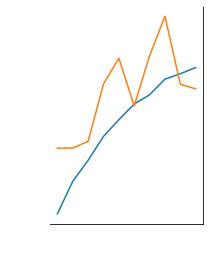

In [10]:
#visualize the model performance by epoch
fig = plt.figure()

ax = fig.add_subplot(121)

ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()

In [19]:
#save the model
model.save('model.v1')

INFO:tensorflow:Assets written to: model.v1/assets


INFO:tensorflow:Assets written to: model.v1/assets
